## Part 1: Introduction of the Dataset

## The dataset gives the number of cases and deaths of Covid-19 in each country and territory of the world during the period of 2019-12-31 and 2020-05-21. The data is originally provided by ECDC (European Center for Diesese Prevention and Control). This dataset is made available and taken from Kaggle (https://www.kaggle.com/roche-data-science-coalition/uncover). 
## https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

The dataset is composed of 11 columns:

daterep: a string representing the date of the data

day: a string representing the day of the data

month: a string representing the month of the data

year: a string representing the year of the data

cases: an int representing the number of cases on that day from that country/territory

death: an int representing the number of deaths on that day from that country/territory

countriesandterritories: a string representing the country/territory

geoid: a string of the ID of the country/territory

countryterritorycode: a string of the code of the country/territory

popdata2018: a string of the 2018 population data of the country/territory

continentexp: a string representing the continent of the country/territory

Cumulative_number_for_14_days_of_COVID-19_cases_per_100000: a string representing the cumulative number for 14 days per 100000 



In [981]:
# Load the dataset
# Remember to change the file location if needed

import csv
f = open("./current-data-on-the-geographic-distribution-of-covid-19-cases-worldwide.csv")
coronavirus_data = csv.reader(f, delimiter = ',')
#type(coronavirus_data)


In [982]:
# We define a header based on the first row of the dataset
dataset = []
# Start appending lines to dataset
first = True
for line in coronavirus_data:
    
    # The first line is the header
    if first:
        header = line
        first = False
    else:
        d = dict(zip(header, line))
        #only capture the needed columns
        d['cases']=int(d['cases']) #transform str to int
        d['deaths']=int(d['deaths']) #transform str to int
        #d['popdata2018']=d['popdata2018']
        # Capture the fields we want row by row
        #d2 = {}
        #for field in [ 'daterep', 'cases', 'deaths','countriesandterritories','popdata2018' ]: 
         #   d2[field] = d[field]
         #   dataset.append(d2)
        dataset.append(d)

#print(dataset[0:9])
# What's in your dataset's 20th row?
#print(type(dataset))
#print(type(dataset[0]['popdata2018']))
      
#print(type(dataset[20]['daterep']))

## Cleansing of the data
All needed columns (date, case, death, country/territory, population) have valid data except for the population ('popdata2018'), some countries/territories have no population data in 2018. The countries with no population data will not be considered when the case or death to population ratio is studied in Part 3 Data Visualization. 

## Part 2: Basic Statistics


In [983]:
# Q: What is the total number of entries in the dataset?
#print(len(dataset))
# A: 18412

# Q: What is the total number of the cases?
print(sum(data['cases'] for data in dataset))
# Q: What is the total number of the deaths?
print(sum(data['deaths'] for data in dataset))

4960975
327904


## There are in total 4960975 cases of covid-19 in the world during 2019-12-31 and 2020-05-21.

## There are in total 327904 deaths of covid-19 in the world during 2019-12-31 and 2020-05-21.

## Part 3: Data Visualization

In [984]:
from datetime import datetime
from collections import OrderedDict
import matplotlib.pyplot as plt

# make a (date, case/death) dictionary
case=dict()
death=dict()
for data in dataset:
    if data['daterep'] not in case:
        case[data['daterep']]=data['cases']        
        death[data['daterep']]=data['deaths']
    else:
        case[data['daterep']]+=data['cases']
        death[data['daterep']]+=data['deaths']
#print(list(case.keys())[0])

#transform the date string to datetime
case = {datetime.strptime(k, '%Y-%m-%d'):v for k,v in case.items()}
death = {datetime.strptime(k, '%Y-%m-%d'):v for k,v in death.items()}
#print(type(list(case.keys())[0]))
#print(datetime.strptime(list(case.keys())[0], '%Y-%m-%d').date())
#print(type(datetime.strptime(list(case.keys())[0], '%Y-%m-%d').date()))


In [985]:
#verify if the total number of cases is correct
#print(sum(case.values()))
#print(sum(death.values()))

# sort the cases and deaths by date
ordered_case = OrderedDict(
    #sorted(case.items(), key = lambda x:datetime.strptime(x[0], '%Y-%m-%d')))
    sorted(case.items()))
#print(list(ordered_case.items())[:3])
ordered_death = OrderedDict(
    #sorted(death.items(), key = lambda x:datetime.strptime(x[0], '%Y-%m-%d')))
    sorted(death.items()))
#list(ordered_case.keys())[0]=datetime.strptime(list(ordered_case.keys())[0], '%Y-%m-%d').date()
#print(list(ordered_case.items())[0])
#print(list(ordered_case.items())[-1])
#print(list(ordered_death.items())[:3])
#print(ordered_case.keys()[0])
#print(type(list(ordered_case.keys())[0]))



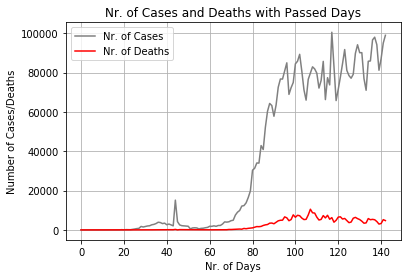

In [986]:
#check if the date is already transformed into a date object
#print(type(list(ordered_case.keys())[0]))

#line plot of cases/deaths with passing days
#map the date to the nr. of days passed from the beginning
beginning_date=list(ordered_case)[0]
ordered_case = {(k-beginning_date).days:v for k,v in ordered_case.items()}
ordered_death = {(k-beginning_date).days:v for k,v in ordered_death.items()}
#print(list(ordered_case.items())[:3])
#print(list(ordered_death.items())[:3])

X = list(ordered_case.keys())
Y_case = list(ordered_case.values())
Y_death = list(ordered_death.values())

# Customize plot
plt.gca().set(xlabel='Nr. of Days', ylabel='Number of Cases/Deaths',
       title='Nr. of Cases and Deaths with Passed Days')
plt.grid()
plt.plot(X, Y_case, label = "Nr. of Cases", color='grey')
plt.plot(X, Y_death, label = "Nr. of Deaths", color='red')
plt.legend()
# Display a figure.
plt.show()

## It can be seen from the figure that from day 20 (2020-01-19), the number of cases (in each day) is increasing. Especially from day 60 (2020-02-29), the number of cases is increasing rapidly. From day 100(2020-04-09), the number of cases starts to fluctuate but still gradually increases. 

## In terms of number of deaths,  the figure starts to increase from around day 70(2020-03-10), and fluctuates from day 100 (2020-04-09) and gradually decreases.

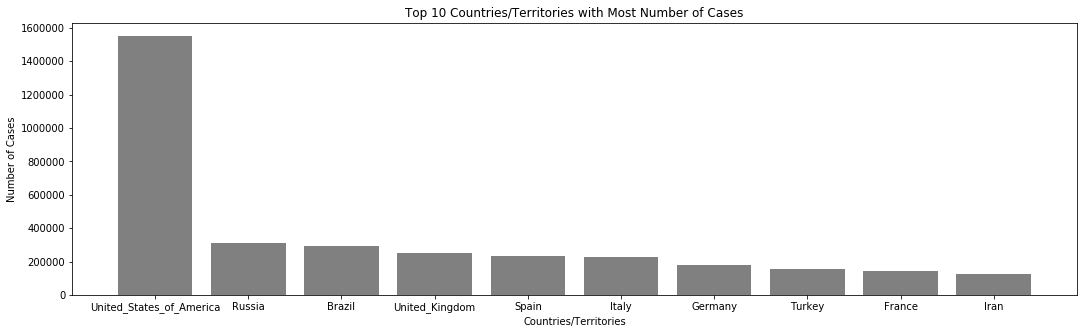

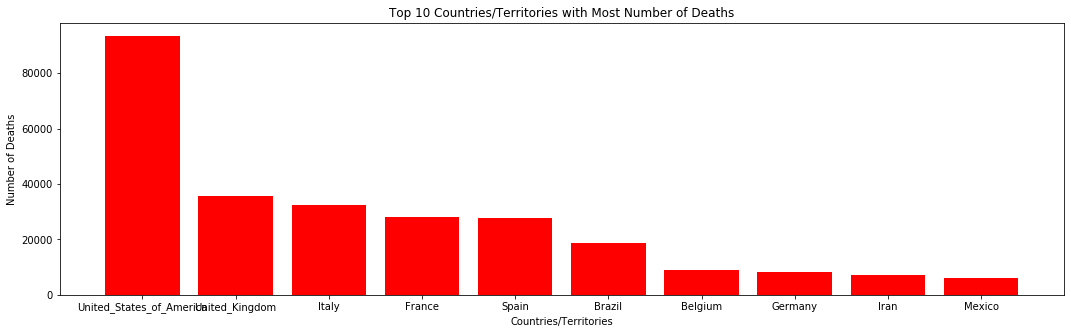

In [987]:
#plot the number of cases in top 10 countries with most cases
# make a (countriesandterritories, case/death) dictionary
case_countries=dict()
death_countries=dict()
for data in dataset:
    if data['countriesandterritories'] not in case_countries:
        case_countries[data['countriesandterritories']]=data['cases']        
        death_countries[data['countriesandterritories']]=data['deaths']
    else:
        case_countries[data['countriesandterritories']]+=data['cases']
        death_countries[data['countriesandterritories']]+=data['deaths']
#print(list(case_countries.items())[:5])
#print(list(death_countries.items())[:5])

ordered_case_countries = OrderedDict(
    sorted(case_countries.items(), key = lambda item:item[1],reverse=True))
ordered_death_countries = OrderedDict(
    sorted(death_countries.items(), key = lambda item:item[1],reverse=True))
#print(list(ordered_case_countries.items())[:10])
#print(list(ordered_death_countries.items())[:10])

top10_case_countries = list(ordered_case_countries.keys())[:10]
case_top10_countries=list(ordered_case_countries.values())[:10]
top10_death_countries = list(ordered_death_countries.keys())[:10]
death_top10_countries=list(ordered_death_countries.values())[:10]
plt.figure(figsize=(18,5))
plt.gca().set(xlabel='Countries/Territories', ylabel='Number of Cases',
       title='Top 10 Countries/Territories with Most Number of Cases')
plt.bar(top10_case_countries, case_top10_countries, color='grey')
plt.show()
plt.figure(figsize=(18,5))
plt.gca().set(xlabel='Countries/Territories', ylabel='Number of Deaths',
       title='Top 10 Countries/Territories with Most Number of Deaths')
plt.bar(top10_death_countries, death_top10_countries, color='red')
plt.show()

## United States has the largest total number of cases and deaths during the period, and most countries with the top 10 most number of cases have also the most number of deaths. Except Russsia and Turkey, which have most numbers of cases (in the top 10), but don't appear in the countries with most number of deaths.

Text(0, 0.5, 'Nr. of Deaths')

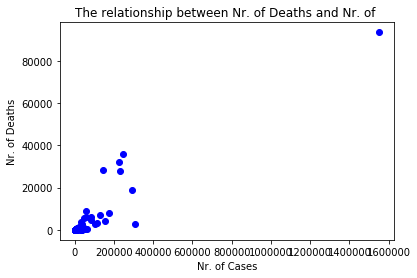

In [988]:
# study the relationship between case and death

alphabetical_case_countries = OrderedDict(
    sorted(case_countries.items()))
alphabetical_death_countries = OrderedDict(
    sorted(death_countries.items()))
#print(list(alphabetical_case_countries.items())[:5])
#print(list(alphabetical_death_countries.items())[:5])
#print(len(list(alphabetical_case_countries.items())))

plt.scatter(list(alphabetical_case_countries.values()), list(alphabetical_death_countries.values()), c ="blue")
plt.title('The relationship between Nr. of Deaths and Nr. of ')
plt.xlabel('Nr. of Cases')
plt.ylabel('Nr. of Deaths')



Text(0, 0.5, 'Nr. of Deaths')

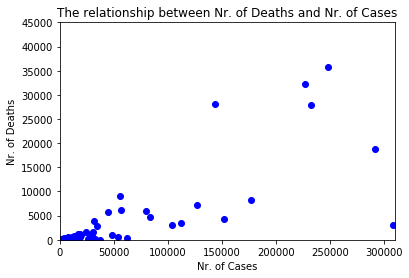

In [989]:
#examine the relationship between cases and deaths in common range 
plt.scatter(list(alphabetical_case_countries.values()), list(alphabetical_death_countries.values()), c ="blue")
plt.xlim(0, 310000)
plt.ylim(0,45000)
plt.title('The relationship between Nr. of Deaths and Nr. of Cases')
plt.xlabel('Nr. of Cases')
plt.ylabel('Nr. of Deaths')

## From the figure, it can be seen that with higher number of cases (in one country), the number of deaths is NOT definitely higher.

0.02919694023219071


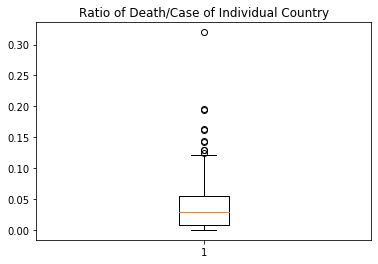

In [990]:
import statistics
ratio_death_case= {k:(alphabetical_death_countries[k]/v) for k,v in alphabetical_case_countries.items()}
plt.boxplot(list(ratio_death_case.values()))
plt.title('Ratio of Death/Case of Individual Country')
print(statistics.median(list(ratio_death_case.values())))

## The median number of the death/case ratio is about 0.0292 (less than 3%).

In [991]:
#remove the countries with no population data
#check the type of population data in the existing dataset
type_population_data=set()
for data in dataset:
    type_population_data.add(type(data['popdata2018']))
                             
#print(type_population_data)
#print(len(dataset))  
reduced_dataset=[]
for data in dataset:
    #if data['countriesandterritories']=='Anguilla':
        #print(data['popdata2018']=='')
    if data['popdata2018']: #if population data is not missing
        data['popdata2018']=int(data['popdata2018'])
        reduced_dataset.append(data)
        
#print(len(reduced_dataset))

#for data in dataset:
#    if data['countriesandterritories']=='Anguilla':
#        print(data['popdata2018'])
        
# Q: What is the total number of the cases?
#print(sum(data['cases'] for data in reduced_dataset))
# A: 24804875
# Q: What is the total number of the deaths?
#print(sum(data['deaths'] for data in reduced_dataset))
# A: 1639520

## The countries/territories with no population data ('popdata2018') are removed when studying the relationship between number cases/deaths and population.

In [992]:
# study the relationship between case/death and population
population_country=dict()
case_country=dict()
death_country=dict()
for data in reduced_dataset:
    if data['countriesandterritories'] not in population_country:
        population_country[data['countriesandterritories']]=data['popdata2018']
        case_country[data['countriesandterritories']]=data['cases']
        death_country[data['countriesandterritories']]=data['deaths']
    else:
        case_country[data['countriesandterritories']]+=data['cases']
        death_country[data['countriesandterritories']]+=data['deaths']

#print(list(population_country.items())[:10])
#print(type(population_country['Afghanistan']))
#print(list(case_country.items())[:10])
#print(list(death_country.items())[:10])

In [993]:
#print(type(list(population_country.values())[0]))
#print(type(list(case_country.values())[0]))

#plt.scatter(list(population_country.values()), list(case_country.values()), c ="lightblue")
#plt.title('The relationship between Nr. of Cases and Country Population ')
#plt.ylim(0,2000000)
#plt.xlabel('Country Population')
#plt.ylabel('Nr. of Cases')

#the top10 countries with the highest case/population ratio
#alphabetical_population_country = OrderedDict(
#    sorted(population_country.items()))
#alphabetical_case_country = OrderedDict(
#    sorted(case_country.items()))
#alphabetical_death_country = OrderedDict(
#    sorted(death_country.items()))

ratio_case_population=dict()
ratio_case_population = {k:case_country[k]/population_country[k] for k,v in case_country.items()}
sorted_ratio_case_population = OrderedDict(
    sorted(ratio_case_population.items(),key=lambda x:x[1],reverse=True))
#print(list(sorted_ratio_case_population.items())[:10])

ratio_death_population=dict()
ratio_death_population = {k:death_country[k]/population_country[k] for k,v in death_country.items()}
sorted_ratio_death_population = OrderedDict(
    sorted(ratio_death_population.items(),key=lambda x:x[1],reverse=True))
#print(list(sorted_ratio_death_population.items())[:10])



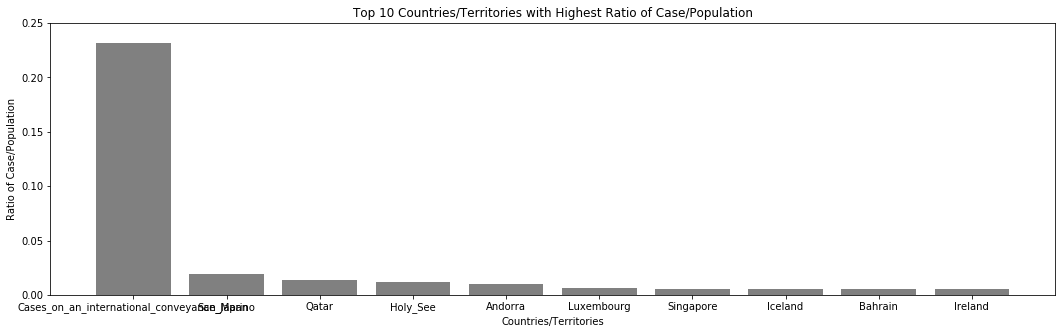

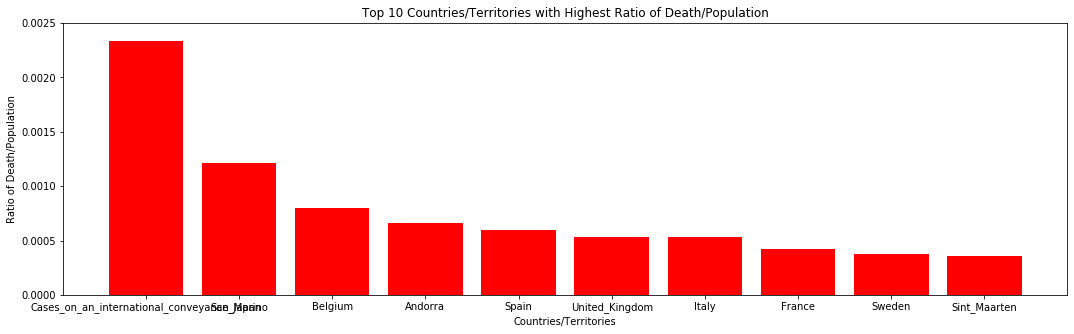

In [994]:

ratio_top10_ratio_case_population=list(sorted_ratio_case_population.values())[:10]
top10_ratio_case_population = list(sorted_ratio_case_population.keys())[:10]
ratio_top10_ratio_death_population=list(sorted_ratio_death_population.values())[:10]
top10_ratio_death_population = list(sorted_ratio_death_population.keys())[:10]
plt.figure(figsize=(18,5))
plt.gca().set(xlabel='Countries/Territories', ylabel='Ratio of Case/Population',
       title='Top 10 Countries/Territories with Highest Ratio of Case/Population')
plt.bar(top10_ratio_case_population, ratio_top10_ratio_case_population, color='grey')
plt.ylim(0,0.25)
plt.show()
plt.figure(figsize=(18,5))
plt.gca().set(xlabel='Countries/Territories', ylabel='Ratio of Death/Population',
       title='Top 10 Countries/Territories with Highest Ratio of Death/Population')
plt.bar(top10_ratio_death_population, ratio_top10_ratio_death_population, color='red')
plt.ylim(0,0.0025)
plt.show()

## It can be seen from the figures that the Japanese international conveyance has the highest case and death to population ratios. Except for San Marino and Andorra, there are no other countries appearing in both the highest case/population ratio and highest death/population ratio lists. 